In [3]:
import tensorflow as tf
try: [tf.config.experimental.set_memory_growth(gpu, True) for gpu in tf.config.experimental.list_physical_devices("GPU")]
except: pass

import os
import tarfile
import pandas as pd
from tqdm import tqdm
from urllib.request import urlopen
from io import BytesIO

In [4]:
from model import train_model
from configs import ModelConfigs

In [17]:
dataset_path = "D:/4-2- capstone/LJSpeech-1.1/LJSpeech-1.1"
metadata_path = dataset_path+"/metadata.csv"
wavs_path = dataset_path+"/wavs"

# Read metadata file and parse it
metadata_df = pd.read_csv(metadata_path, sep="|", header=None, quoting=3)
metadata_df.columns = ["file_name", "transcription", "normalized_transcription"]
metadata_df = metadata_df[["file_name", "normalized_transcription"]]

# structure the dataset where each row is a list of [wav_file_path, sound transcription]
dataset = [[os.path.join(wavs_path, f"{file}.wav"), label] for file, label in metadata_df.values.tolist()]

# Create a ModelConfigs object to store model configurations
configs = ModelConfigs()

max_text_length, max_spectrogram_length = 0, 0
for file_path, label in tqdm(dataset):
    spectrogram = WavReader.get_spectrogram(file_path, frame_length=configs.frame_length, frame_step=configs.frame_step, fft_length=configs.fft_length)
    valid_label = [c for c in label.lower() if c in configs.vocab]
    max_text_length = max(max_text_length, len(valid_label))
    max_spectrogram_length = max(max_spectrogram_length, spectrogram.shape[0])
    configs.input_shape = [max_spectrogram_length, spectrogram.shape[1]]

configs.max_spectrogram_length = max_spectrogram_length
configs.max_text_length = max_text_length
configs.save()

100%|██████████| 13100/13100 [02:36<00:00, 83.82it/s]


In [26]:
print(dataset[0])

['D:/4-2- capstone/LJSpeech-1.1/LJSpeech-1.1/wavs\\LJ001-0001.wav', 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition']


In [27]:
import random
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Waveform

Sample rate of LJ001-0001.wav: 22050 Hz


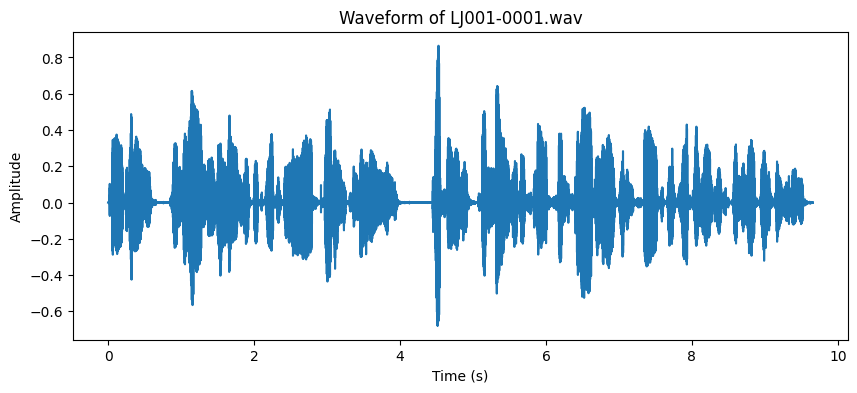

Sample rate of LJ001-0002.wav: 22050 Hz


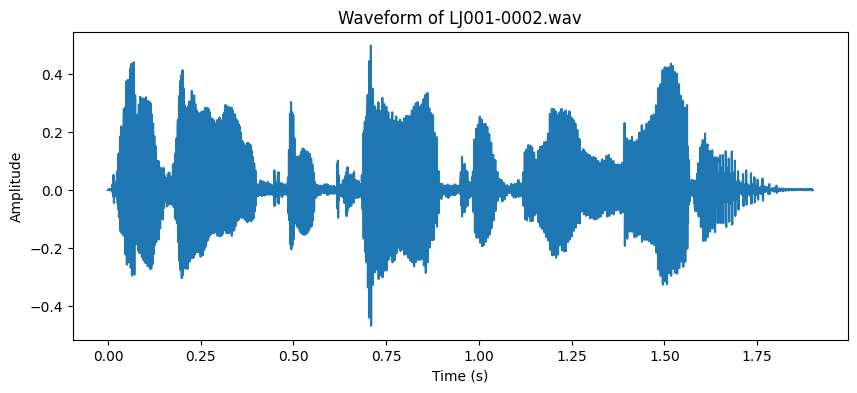

Sample rate of LJ001-0003.wav: 22050 Hz


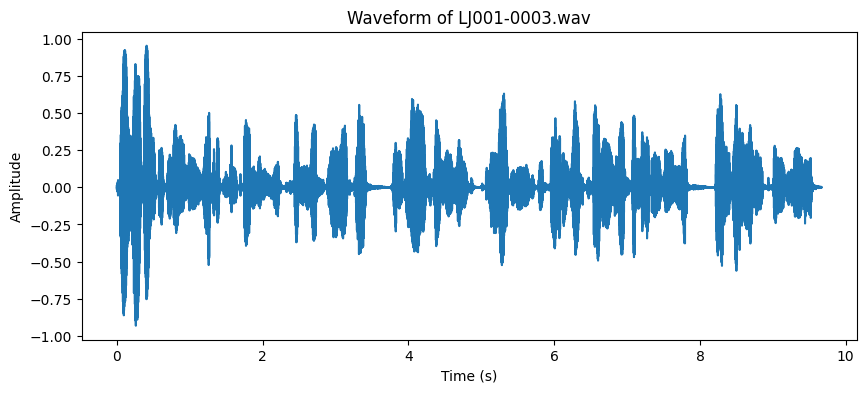

Sample rate of LJ001-0004.wav: 22050 Hz


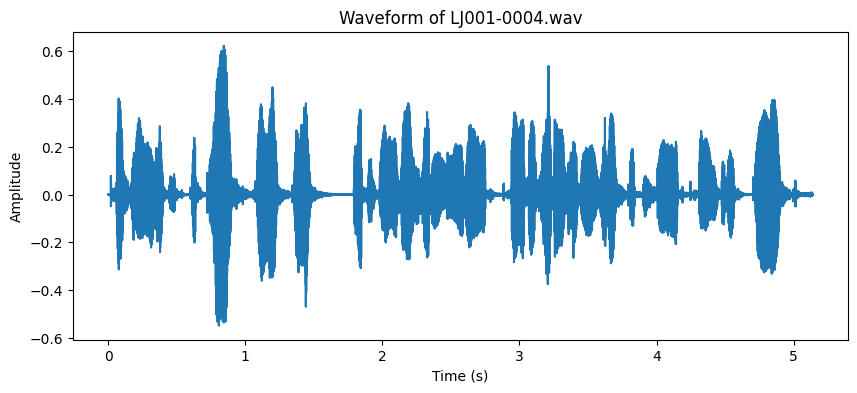

Sample rate of LJ001-0005.wav: 22050 Hz


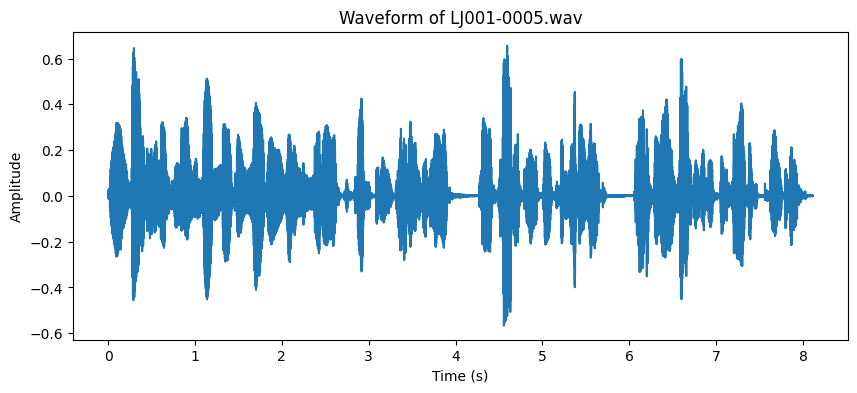

In [32]:
random_files = random_files = dataset[:5]

for file_info in random_files:
    filepath, label = file_info
    
    # Load the audio file
    audio, sr = librosa.load(filepath)
    
    # Print the sample rate
    print(f"Sample rate of {os.path.basename(filepath)}: {sr} Hz")
    
    # Plot the waveform
    plt.figure(figsize=(10, 4))
    plt.title(f"Waveform of {os.path.basename(filepath)}")
    plt.plot(np.linspace(0, len(audio) / sr, num=len(audio)), audio)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()
    


# Mel- Frequency Cepstral Coefficients (MFCCs) 

Sample rate of LJ001-0001.wav: 22050 Hz


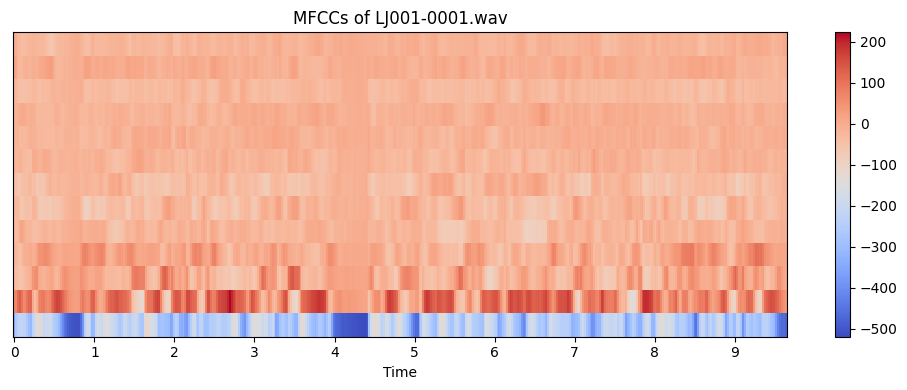

Sample rate of LJ001-0002.wav: 22050 Hz


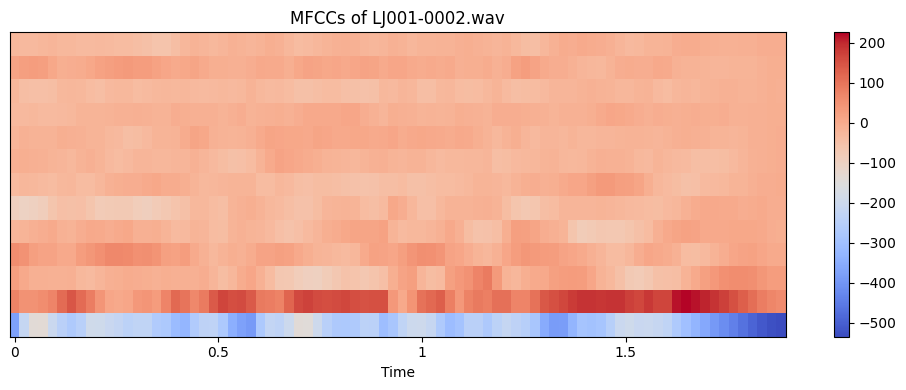

Sample rate of LJ001-0003.wav: 22050 Hz


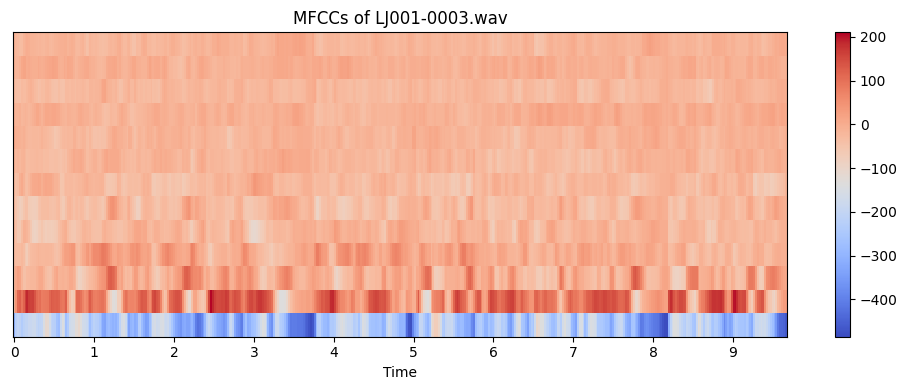

Sample rate of LJ001-0004.wav: 22050 Hz


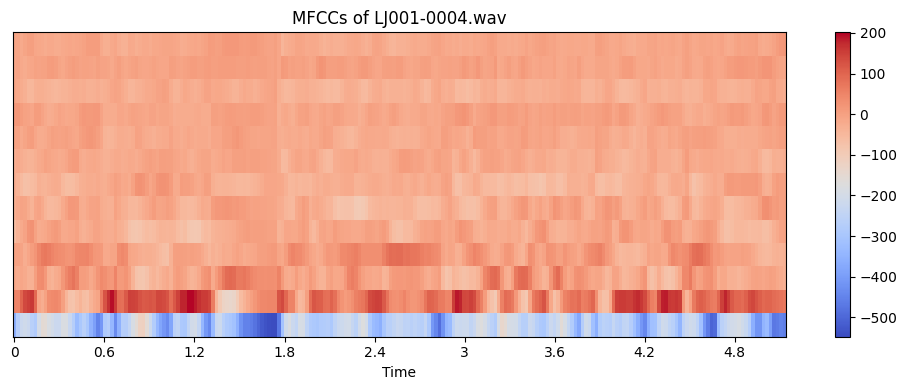

Sample rate of LJ001-0005.wav: 22050 Hz


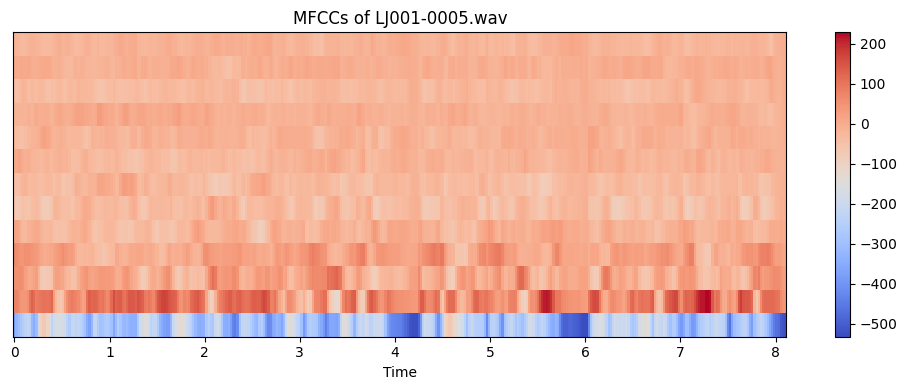

In [34]:
random_files = dataset[:5]

for file_info in random_files:
    filepath, label = file_info
    
    # Load the audio file
    audio, sr = librosa.load(filepath)
    
    # Print the sample rate
    print(f"Sample rate of {os.path.basename(filepath)}: {sr} Hz")
    
    # Mel-Frequency Cepstral Coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs of {os.path.basename(filepath)}')
    plt.tight_layout()
    plt.show()
    

#  Mel Spectrogram

Sample rate of LJ001-0001.wav: 22050 Hz


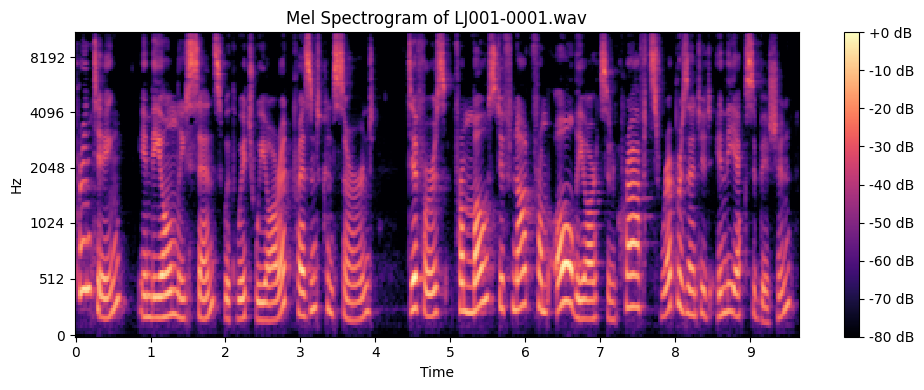

Sample rate of LJ001-0002.wav: 22050 Hz


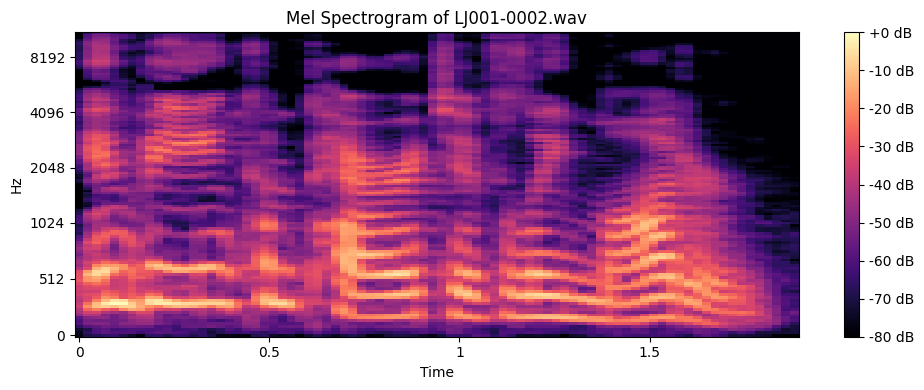

Sample rate of LJ001-0003.wav: 22050 Hz


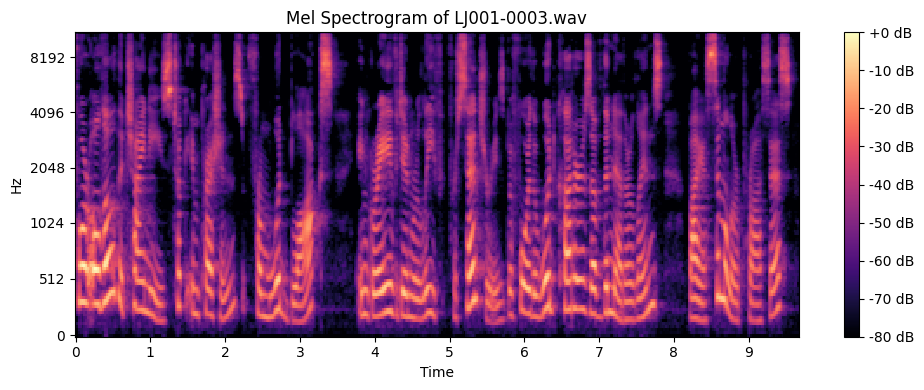

Sample rate of LJ001-0004.wav: 22050 Hz


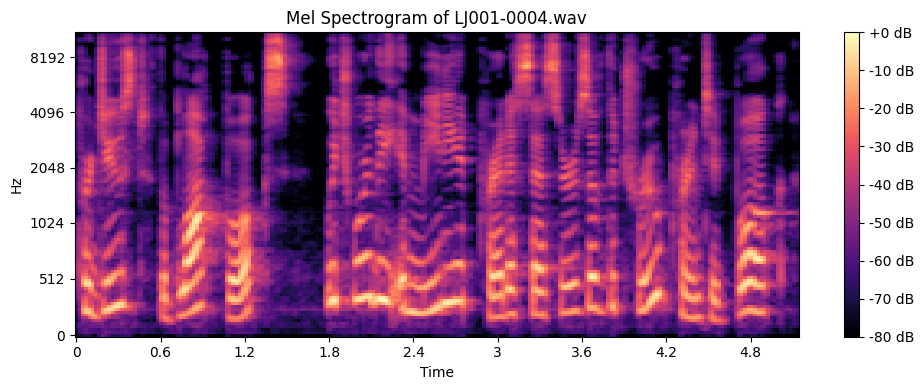

Sample rate of LJ001-0005.wav: 22050 Hz


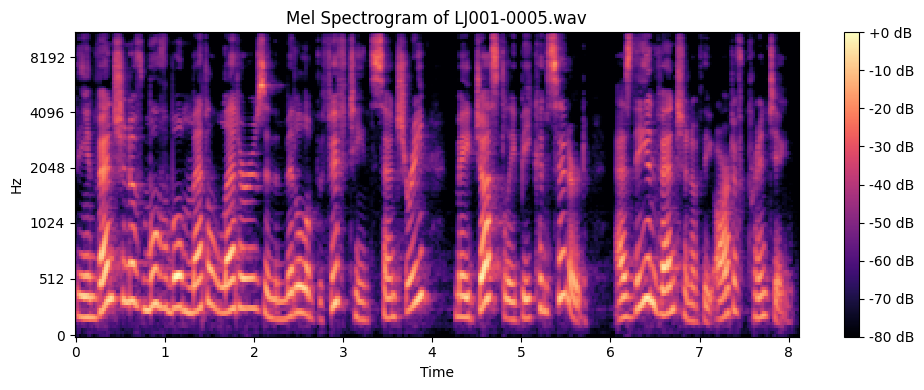

In [35]:
random_files = dataset[:5]

for file_info in random_files:
    filepath, label = file_info
    
    # Load the audio file
    audio, sr = librosa.load(filepath)
    
    # Print the sample rate
    print(f"Sample rate of {os.path.basename(filepath)}: {sr} Hz")
    # Mel Spectrogram
    
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram of {os.path.basename(filepath)}')
    plt.tight_layout()
    plt.show()
    

# Log-Mel Spectrogram

Sample rate of LJ001-0001.wav: 22050 Hz


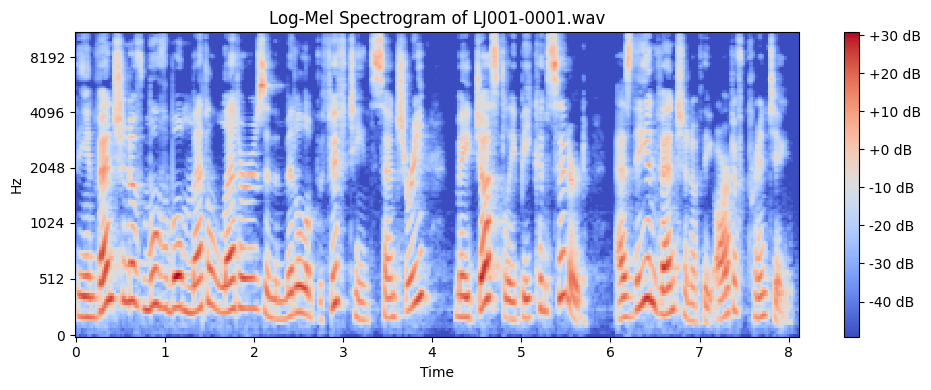

Sample rate of LJ001-0002.wav: 22050 Hz


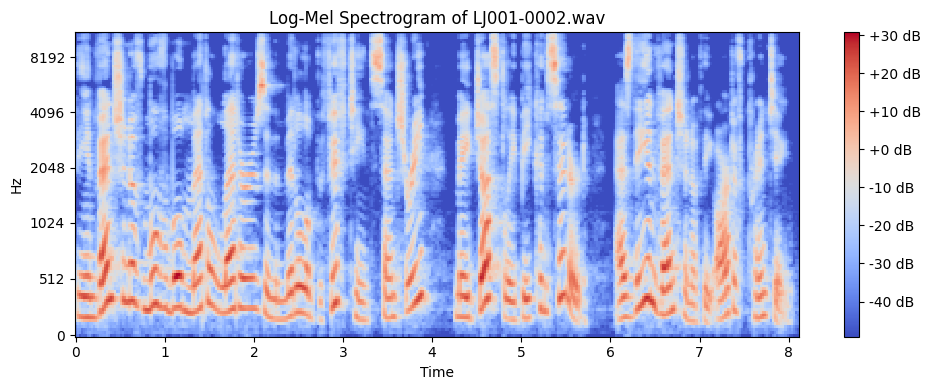

Sample rate of LJ001-0003.wav: 22050 Hz


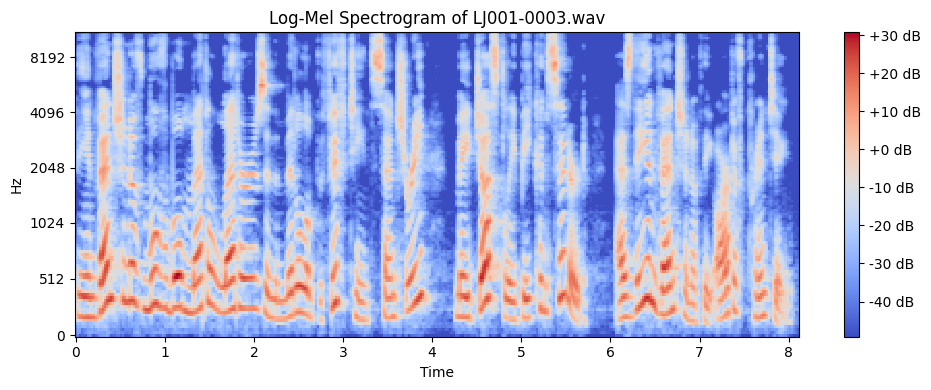

Sample rate of LJ001-0004.wav: 22050 Hz


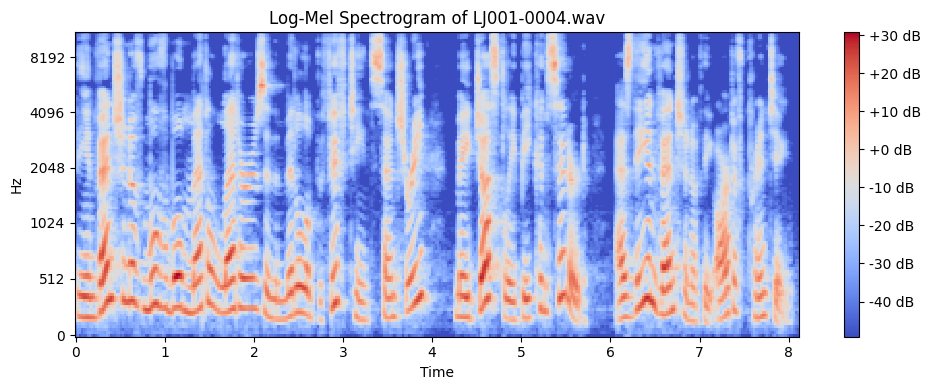

Sample rate of LJ001-0005.wav: 22050 Hz


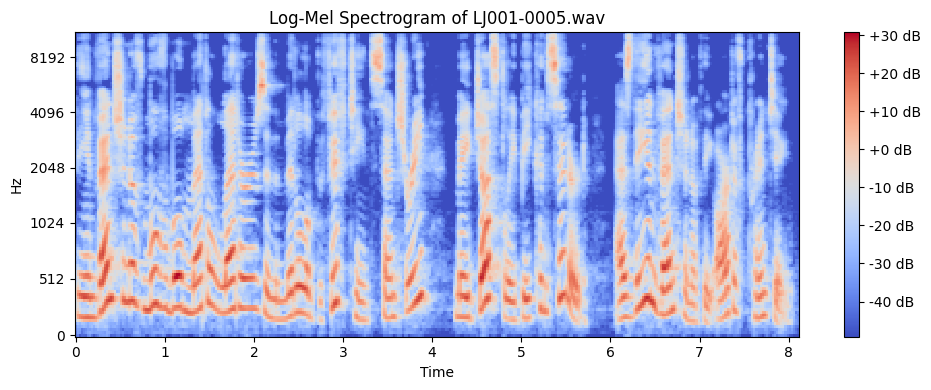

In [36]:
random_files = dataset[:5]

for file_info in random_files:
    filepath, label = file_info
    
    # Load the audio file
    audio, sr = librosa.load(filepath)
    
    # Print the sample rate
    print(f"Sample rate of {os.path.basename(filepath)}: {sr} Hz")
    
    # Log-Mel Spectrogram
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log-Mel Spectrogram of {os.path.basename(filepath)}')
    plt.tight_layout()
    plt.show()
    

# Spectral Contrast

Sample rate of LJ001-0001.wav: 22050 Hz


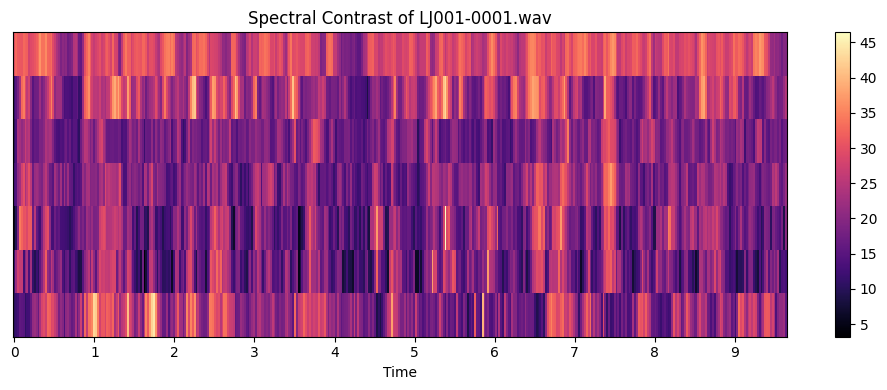

Sample rate of LJ001-0002.wav: 22050 Hz


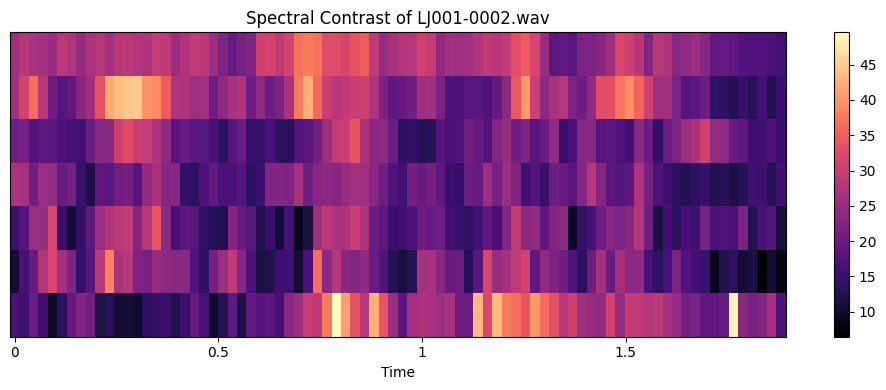

Sample rate of LJ001-0003.wav: 22050 Hz


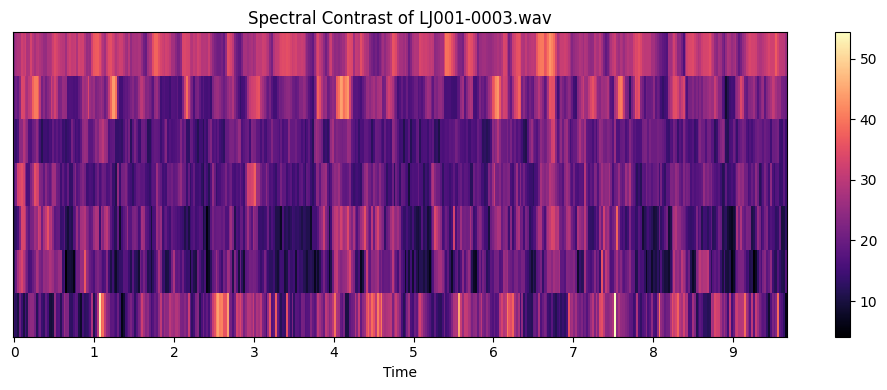

Sample rate of LJ001-0004.wav: 22050 Hz


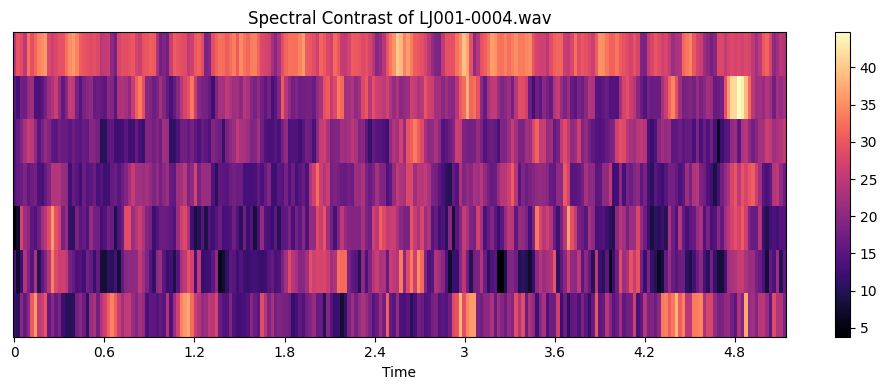

Sample rate of LJ001-0005.wav: 22050 Hz


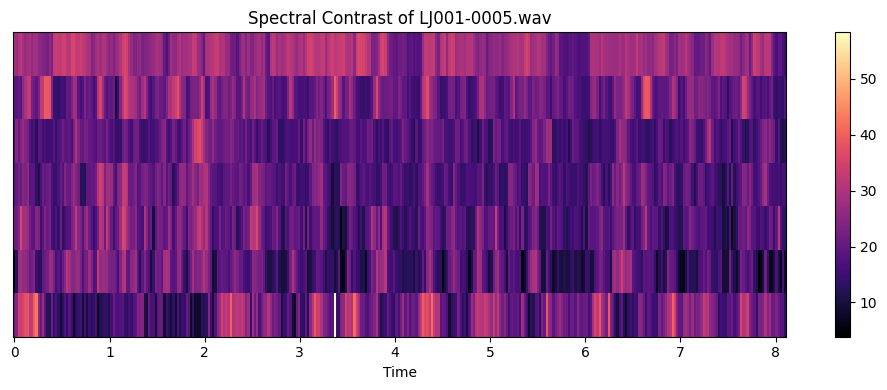

In [37]:
random_files = dataset[:5]

for file_info in random_files:
    filepath, label = file_info
    
    # Load the audio file
    audio, sr = librosa.load(filepath)
    
    # Print the sample rate
    print(f"Sample rate of {os.path.basename(filepath)}: {sr} Hz")
    
    # Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectral_contrast, x_axis='time')
    plt.colorbar()
    plt.title(f'Spectral Contrast of {os.path.basename(filepath)}')
    plt.tight_layout()
    plt.show()
    

# Chroma Features

Sample rate of LJ001-0001.wav: 22050 Hz


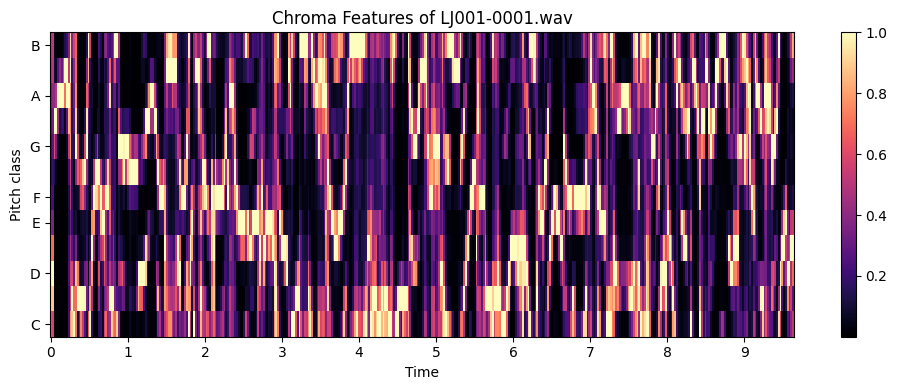

Sample rate of LJ001-0002.wav: 22050 Hz


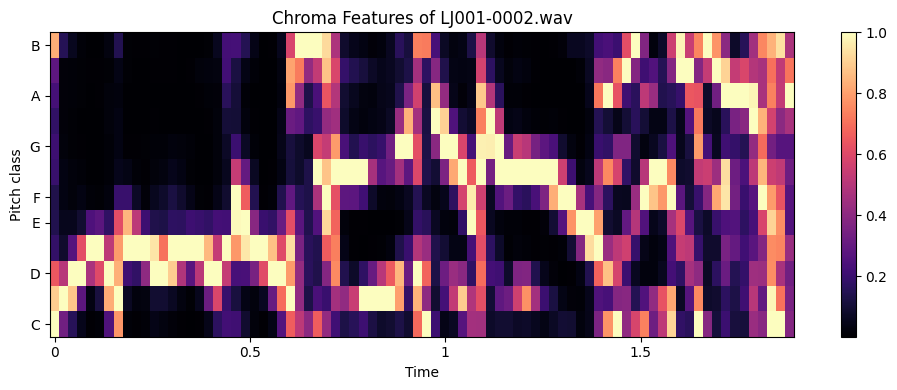

Sample rate of LJ001-0003.wav: 22050 Hz


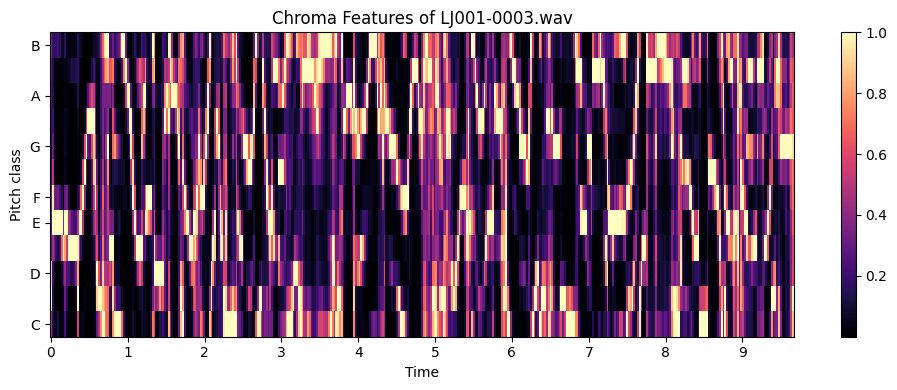

Sample rate of LJ001-0004.wav: 22050 Hz


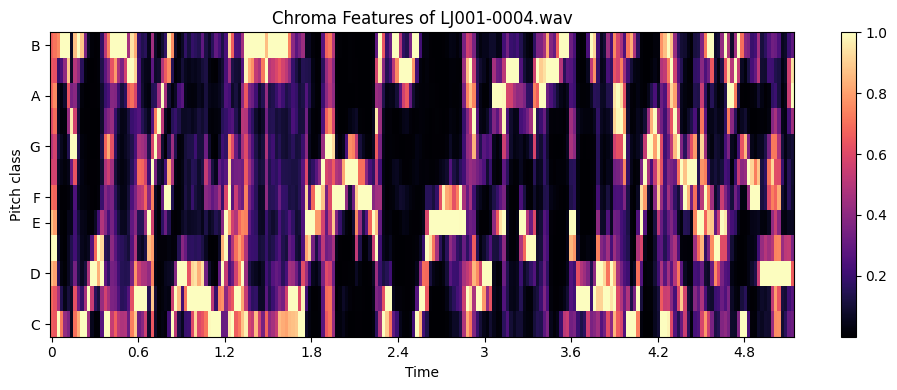

Sample rate of LJ001-0005.wav: 22050 Hz


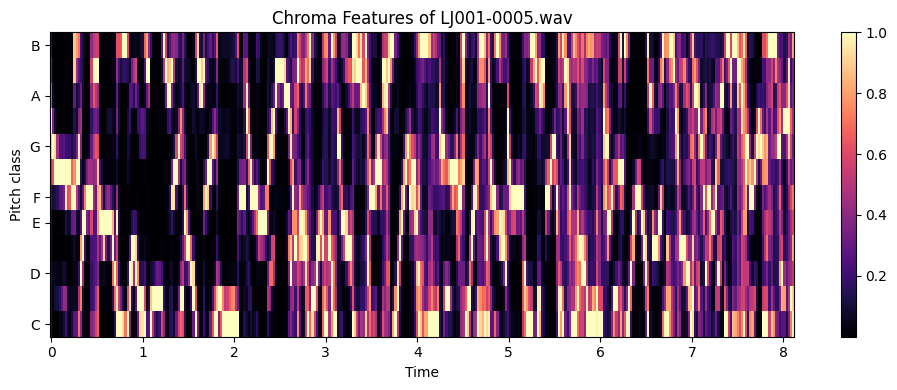

In [38]:
random_files = dataset[:5]

for file_info in random_files:
    filepath, label = file_info
    
    # Load the audio file
    audio, sr = librosa.load(filepath)
    
    # Print the sample rate
    print(f"Sample rate of {os.path.basename(filepath)}: {sr} Hz")
    
    # Chroma Features
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title(f'Chroma Features of {os.path.basename(filepath)}')
    plt.tight_layout()
    plt.show()
    

# Zero Crossing Rate

Sample rate of LJ001-0001.wav: 22050 Hz


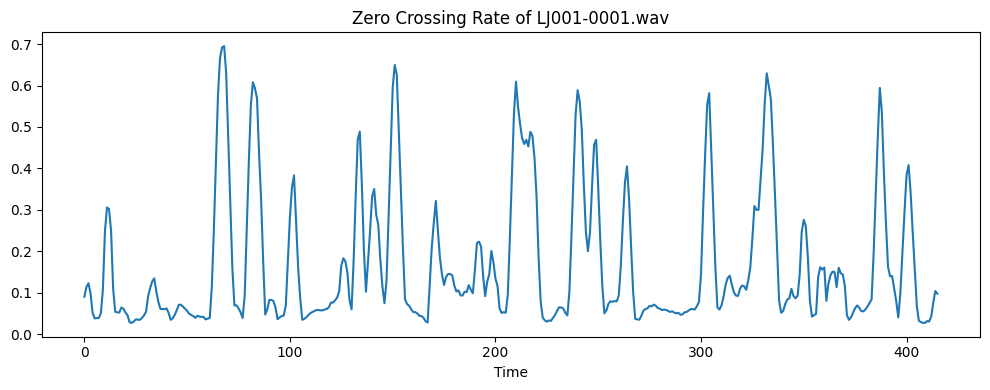

Sample rate of LJ001-0002.wav: 22050 Hz


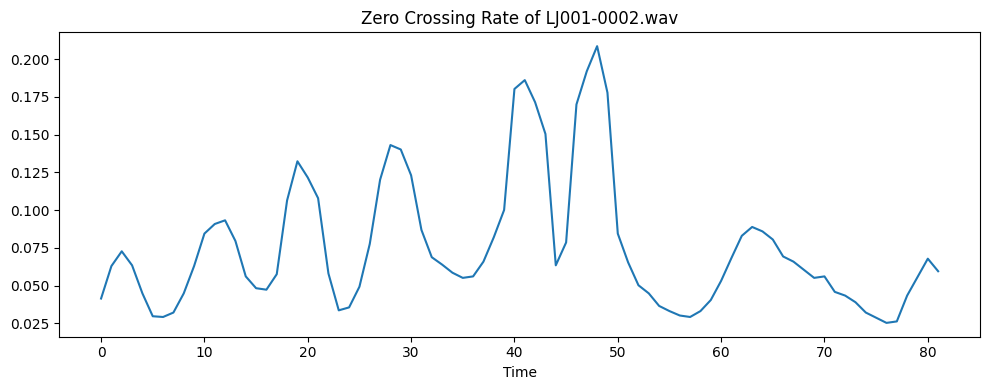

Sample rate of LJ001-0003.wav: 22050 Hz


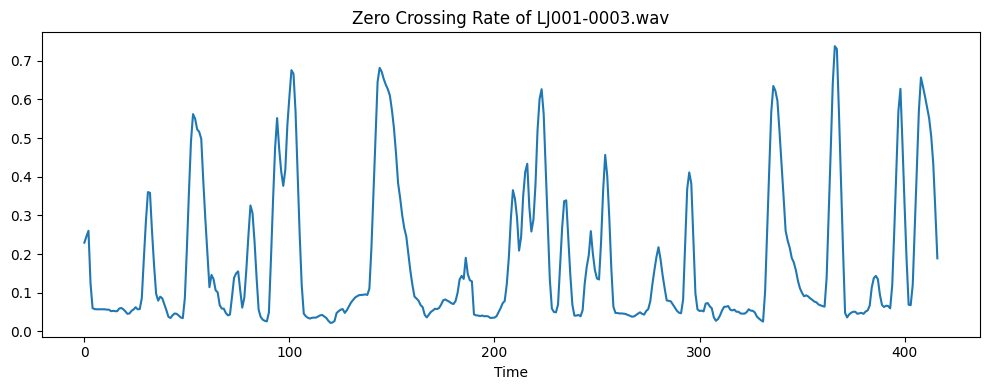

Sample rate of LJ001-0004.wav: 22050 Hz


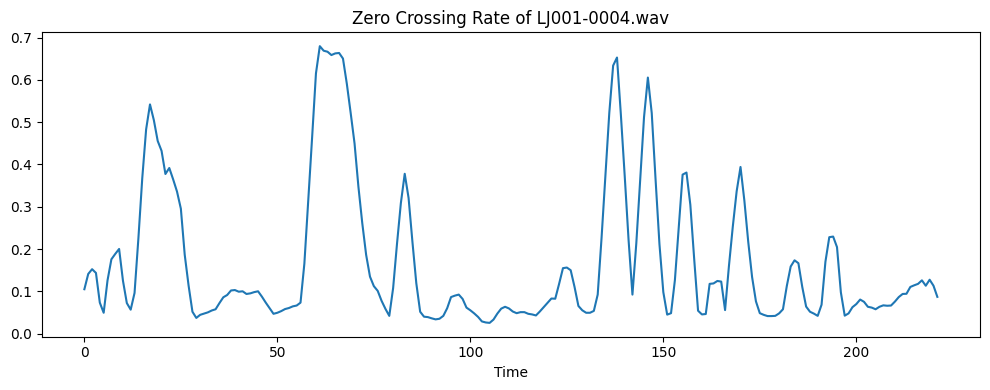

Sample rate of LJ001-0005.wav: 22050 Hz


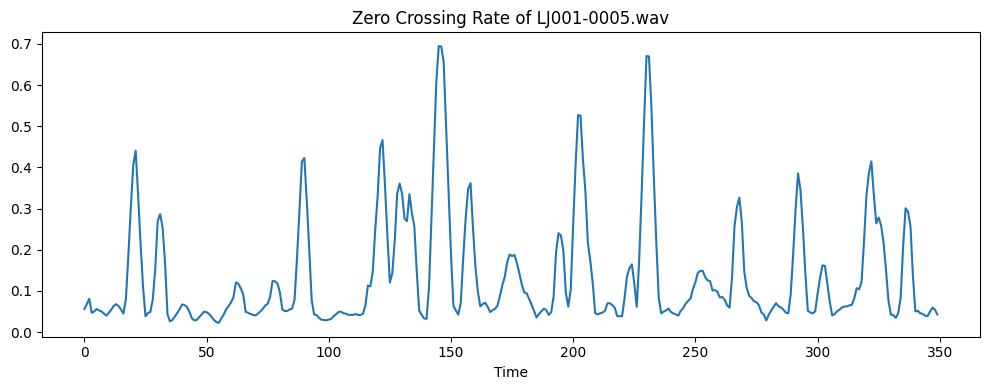

In [39]:
random_files = dataset[:5]

for file_info in random_files:
    filepath, label = file_info
    
    # Load the audio file
    audio, sr = librosa.load(filepath)
    
    # Print the sample rate
    print(f"Sample rate of {os.path.basename(filepath)}: {sr} Hz")
    
    # Zero Crossing Rate
    zcr = librosa.feature.zero_crossing_rate(y=audio)
    plt.figure(figsize=(10, 4))
    plt.plot(zcr[0])
    plt.title(f'Zero Crossing Rate of {os.path.basename(filepath)}')
    plt.xlabel('Time')
    plt.tight_layout()
    plt.show()


# Short-Time Fourier Transform (STFT)

Sample rate of LJ001-0001.wav: 22050 Hz


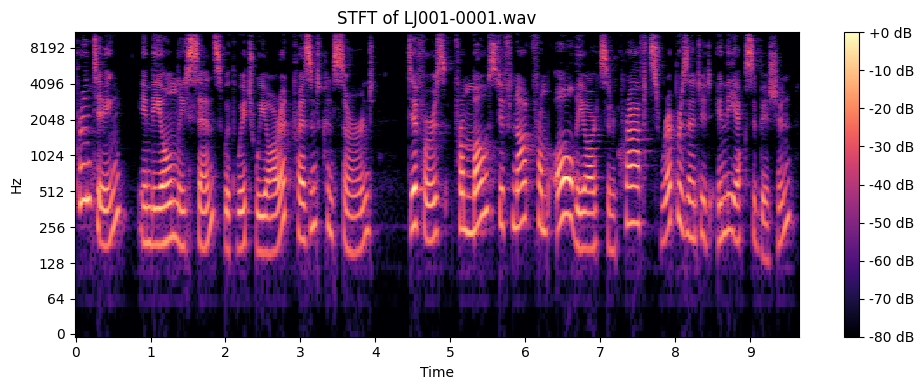

Sample rate of LJ001-0002.wav: 22050 Hz


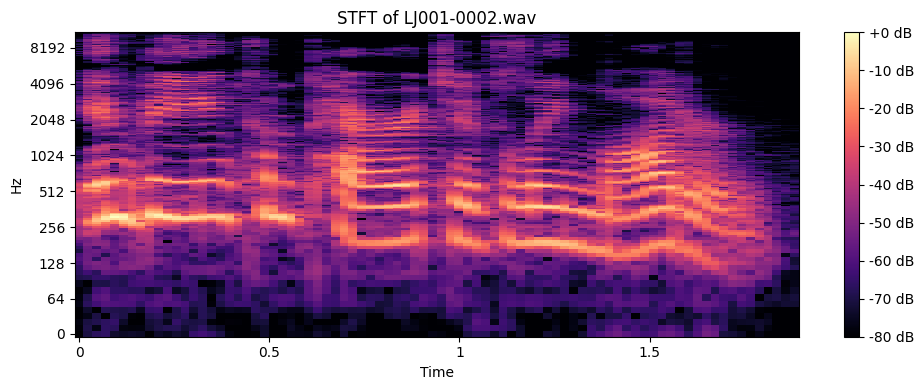

Sample rate of LJ001-0003.wav: 22050 Hz


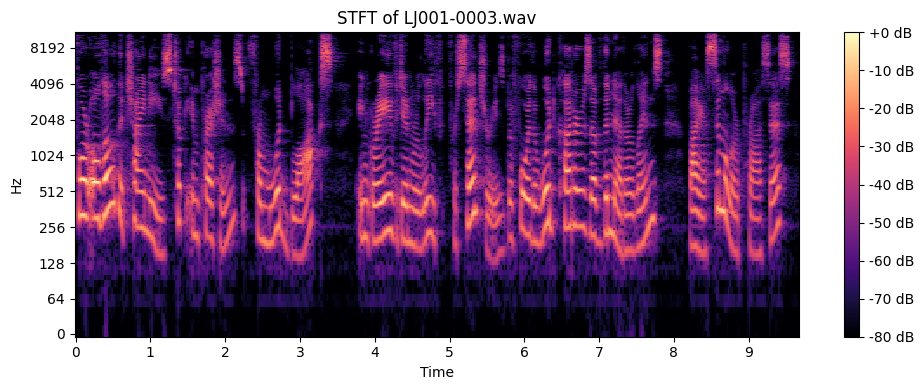

Sample rate of LJ001-0004.wav: 22050 Hz


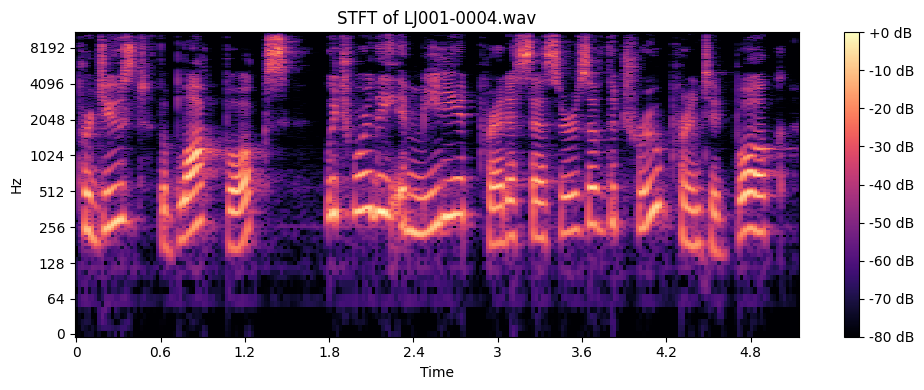

Sample rate of LJ001-0005.wav: 22050 Hz


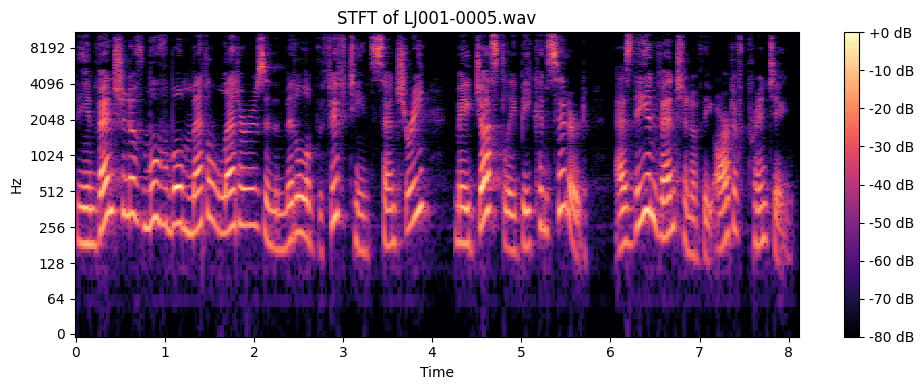

In [40]:
random_files = dataset[:5]

for file_info in random_files:
    filepath, label = file_info
    
    # Load the audio file
    audio, sr = librosa.load(filepath)
    
    # Print the sample rate
    print(f"Sample rate of {os.path.basename(filepath)}: {sr} Hz")
    
    # Short-Time Fourier Transform (STFT)
    stft = np.abs(librosa.stft(audio))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'STFT of {os.path.basename(filepath)}')
    plt.tight_layout()
    plt.show()
